# Part 1. Target customers

In [23]:
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
init_notebook_mode(connected=True)

In [24]:
df = pd.read_csv('clients.csv')
df.head()

,ID,Building,Year of sale,Month of sale,Type of property,Property number,Area (ft.),Price,Status,Customer ID,Entity,Name,Surname,Age at time of purchase,Age Interval,Y,M,D,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source
0,1030,1,2005,11,Apartment,30,743.09,"$ 246,172.68",Sold,C0028,Individual,Madalyn,Mercer,19.0,18-25,1986.0,6.0,21.0,F,USA,California,Home,5,No,Website
1,1029,1,2005,10,Apartment,29,756.21,"$ 246,331.90",Sold,C0027,Individual,Lara,Carrillo,22.0,18-25,1983.0,2.0,24.0,F,USA,California,Home,5,No,Website
2,2002,2,2007,7,Apartment,2,587.28,"$ 209,280.91",Sold,C0112,Individual,Donavan,Flowers,22.0,18-25,1985.0,12.0,27.0,M,USA,California,Home,1,Yes,Client
3,2031,2,2007,12,Apartment,31,1604.75,"$ 452,667.01",Sold,C0160,Individual,Darien,Dorsey,22.0,18-25,1985.0,12.0,27.0,M,USA,California,Investment,3,Yes,Website
4,1049,1,2004,11,Apartment,49,1375.45,"$ 467,083.31",Sold,C0014,Individual,Alessandra,Perry,25.0,18-25,1979.0,5.0,15.0,F,USA,California,Home,4,No,Agency


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       195 non-null    int64  
 1   Building                 195 non-null    int64  
 2   Year of sale             195 non-null    int64  
 3   Month of sale            195 non-null    int64  
 4   Type of property         195 non-null    object 
 5   Property number          195 non-null    int64  
 6   Area (ft.)               195 non-null    float64
 7   Price                    195 non-null    object 
 8   Status                   195 non-null    object 
 9   Customer ID              195 non-null    object 
 10  Entity                   195 non-null    object 
 11  Name                     195 non-null    object 
 12  Surname                  195 non-null    object 
 13  Age at time of purchase  178 non-null    float64
 14  Age Interval             1

In [26]:
df.Country.unique()

array(['USA', 'UK', 'USA ', 'Belgium', 'Russia', 'Denmark', 'Germany',
       'Mexico', 'Canada'], dtype=object)

In [27]:
data = df.copy()

In [28]:
# Leave only the US
data.drop(data[(data['Country'] != 'USA') &
               (data['Country'] != 'USA ')].index,
          inplace=True)
data.Country.value_counts()

USA     165
USA      12
Name: Country, dtype: int64

In [29]:
# Remove whitespaces at the end of lines in the column
data['Country'] = data['Country'].map(lambda x: x.rstrip(' '))
data.Country.unique()

array(['USA'], dtype=object)

In [30]:
data.columns

Index(['ID', 'Building', 'Year of sale', 'Month of sale', 'Type of property',
       'Property number', 'Area (ft.)', 'Price', 'Status', 'Customer ID',
       'Entity', 'Name', 'Surname', 'Age at time of purchase', 'Age Interval ',
       'Y', 'M', 'D', 'Gender', 'Country', 'State', 'Purpose',
       'Deal satisfaction', 'Mortgage', 'Source'],
      dtype='object')

In [31]:
data.groupby('Entity')[['Entity']].count()

,Entity
Entity,
Firm,17
Individual,160


In [32]:
# Exclude customers of 'Entity'-->'Firm', thus leaving individuals only
data.drop(data[data['Entity'] == 'Firm'].index, inplace=True)

In [33]:
data = data.assign(Area_sqm = lambda x: np.round((x['Area (ft.)'] * 0.093), 2),
                    Price = data.Price.replace('[\$ , ]', '', regex=True).astype(float))

In [34]:
# Define targeted columns
data.rename(columns={'Age Interval ': 'Age Group'}, inplace=True)
target_columns = ['Year of sale', 'Type of property', 'Area_sqm', 'Price', 
                'Name', 'Surname', 'Age Group', 'Gender', 'Purpose', 'Source']
data = data[target_columns]
data.head()

,Year of sale,Type of property,Area_sqm,Price,Name,Surname,Age Group,Gender,Purpose,Source
0,2005,Apartment,69.11,246172.68,Madalyn,Mercer,18-25,F,Home,Website
1,2005,Apartment,70.33,246331.90,Lara,Carrillo,18-25,F,Home,Website
2,2007,Apartment,54.62,209280.91,Donavan,Flowers,18-25,M,Home,Client
3,2007,Apartment,149.24,452667.01,Darien,Dorsey,18-25,M,Investment,Website
4,2004,Apartment,127.92,467083.31,Alessandra,Perry,18-25,F,Home,Agency


In [35]:
data.isnull().values.any()

False

In [36]:
data.describe()

,Year of sale,Area_sqm,Price
count,160.000000,160.000000,160.000000
mean,2006.462500,84.315313,271869.659875
std,1.027224,24.367408,79251.150103
min,2004.000000,53.920000,153466.710000
25%,2006.000000,68.430000,214559.095000
50%,2007.000000,73.890000,245196.730000
75%,2007.000000,103.160000,310311.727500
max,2010.000000,180.650000,503790.230000


## A buyer persona:

Age Group and Gender

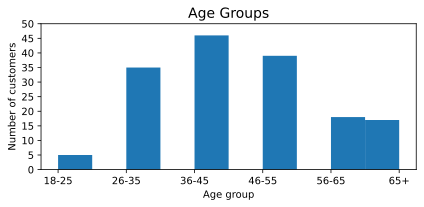

In [37]:
fig, ax = plt.subplots(figsize=(6, 3))

ax.hist(data['Age Group'].values)
ax.set_yticks(range(0,55,5))
ax.set_xlabel('Age group', fontsize=10)
ax.set_ylabel('Number of customers', fontsize=10)
ax.set_title('Age Groups', fontsize=14)

plt.tight_layout(w_pad=7)
plt.show()

In [38]:
age_gender = data.groupby('Age Group')[['Gender']].value_counts()
age_gender

Age Group  Gender
18-25      F          3
           M          2
26-35      M         20
           F         15
36-45      M         28
           F         18
46-55      M         25
           F         14
56-65      F         10
           M          8
65+        M         12
           F          5
dtype: int64

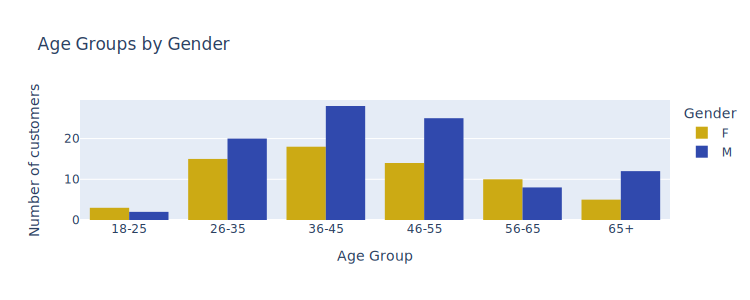

In [39]:
fig = px.histogram(data,
            x='Age Group',
            y='Gender',
            histfunc='count',
            color='Gender',
            barmode='group',
            title='Age Groups by Gender',
            height=300,
            width=750,
            color_discrete_sequence=['#CCAA14', '#3049AD'])
fig.update_layout(yaxis_title="Number of customers")
fig.show('svg')

Type of property, area (sq.m.), price, purpose, and lead source

In [40]:
# Type of property by purpose 
prop = data.groupby(['Type of property', 'Purpose'])[['Type of property']].count()
prop

Type of property
Type of property Purpose                     
Apartment        Home                     113
                 Investment                45
Office           Home                       1
                 Investment                 1

In [41]:
# Average area and price by type of property
prop_area = data.groupby(['Type of property'])[['Area_sqm', 'Price']].mean()
prop_area = np.round(prop_area[['Area_sqm', 'Price']],2)
prop_area

,Area_sqm,Price
Type of property,,
Apartment,84.23,271484.51
Office,90.94,302296.64


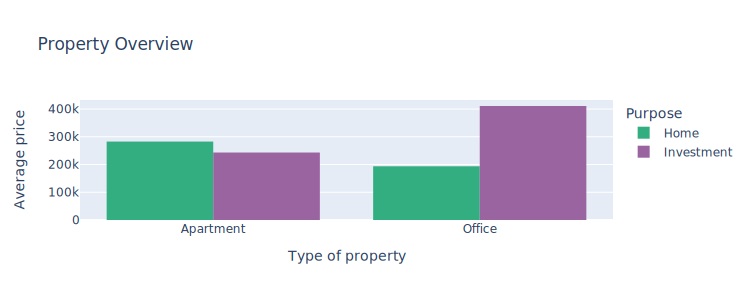

In [42]:
# Average price by type of property and purpose
fig = px.histogram(data,
                x='Type of property',
                y='Price',
                histfunc='avg',
                color='Purpose',
                barmode='group',
                title='Property Overview',
                height=300,
                width=750,
                color_discrete_sequence=['#33AE81', '#9A64A0'])
fig.update_layout(yaxis_title="Average price")
fig.show('svg')

In [43]:
lead_source = data.Source.value_counts()
lead_source

Website    94
Agency     49
Client     17
Name: Source, dtype: int64

In [44]:
lead_source_price = data.groupby('Source')[['Price']].sum()
lead_source_price.style.bar(color='#234990')

,Price
Source,
Agency,13113522.050000
Client,4346737.760000
Website,26038885.770000
